# FASE 01 - VISUALIZAÇÃO DE DADOS

## AULA 01 - TRATAMENTO, EXPLORAÇÃO E VISUALIZAÇÃO DE DADOS

### FIRST VIDEO

In [1]:
import pandas as pd
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

pd.options.display.float_format = '{:.2f}'.format #FORMATTING DECIMAL PLACES VISIBILITY

In [2]:
ibge_estimativa = pd.read_excel('../data/02-pos-data-analytics-visualizacao-de-dados/estimativa_dou_2020.xls',
                               skiprows=1)
ibge_estimativa.head()

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA
0,Brasil,NaN,211755692
1,Região Norte,NaN,18672591
2,Rondônia,NaN,1796460
3,Acre,NaN,894470
4,Amazonas,NaN,4207714


In [3]:
dados_da_populacao = """Posição	Unidade federativa	População(Censo de 2010)	População(Prévia 2022)	Mudança	% da pop. total	País comparável
1	 São Paulo	41 262 199	46 024 937	+11.5%	22,2%	Flag of Spain.svg Espanha (46 754 778)
2	 Minas Gerais	19 597 330	20 732 660	+5.8%	10,0%	 Burquina Fasso (20 903 273)
3	 Rio de Janeiro	15 989 929	16 615 526	+3.9%	8,0%	Camboja Camboja (16 718 965)
4	Bahia Bahia	14 016 906	14 659 023	+4.6%	7,1%	 Zimbabwe (14 862 924)
5	 Paraná	10 444 526	11 835 379	+13.3%	5,7%	 Tunísia (11 818 619)
6	 Rio Grande do Sul	10 693 929	11 088 065	+3.7%	5,3%	 Cuba (11 326 616)
7	 Pernambuco	8 796 448	9 051 113	+2.9%	4,4%	 Áustria (9 006 398)
8	 Ceará	8 452 381	8 936 431	+5.7%	4,3%	 Papua-Nova Guiné (8 947 024)
9	Pará Pará	7 581 051	8 442 962	+11.4%	4,1%	 Suíça (8 654 622)
10	 Santa Catarina	6 248 436	7 762 154	+24.2%	3,7%	 Paraguai (7 132 538)
11	 Goiás	6 003 788	6 950 976	+15.8%	3,3%	 Bulgária (6 948 445)
12	 Maranhão	6 574 789	6 800 605	+3.4%	3,3%	 Bulgária (6 948 445)
13	 Espírito Santo	3 514 952	4 108 508	+13.1%	1,9%	 Geórgia (3 989 167)
14	 Paraíba	3 766 528	4 030 961	+7.0%	1,9%	 Geórgia (3 989 167)
15	 Amazonas	3 483 985	3 952 262	+13.4%	1,9%	 Geórgia (3 989 167)
16	 Mato Grosso	3 035 122	3 784 239	+24.7%	1,8%	 Geórgia (3 989 167)
17	 Rio Grande do Norte	3 168 027	3 303 953	+4.3%	1,6%	 Uruguai (3 473 730)
18	 Piauí	3 118 360	3 270 174	+4.9%	1,6%	 Bósnia e Herzegovina (3 280 819)
19	 Alagoas	3 120 494	3 125 254	+0.2%	1,5%	 Mónaco (3 278 290)
20	 Distrito Federal	2 570 160	2 923 369	+13.7%	1,4%	 Armênia (2 963 243)
21	 Mato Grosso do Sul	2 449 024	2 833 742	+15.7%	1,4%	 Albânia (2 877 797)
22	 Sergipe	2 068 017	2 211 868	+7.0%	1,1%	 Gabão (2 225 734)
23	 Rondônia	1 562 409	1 616 379	+3.5%	0,8%	 Bahrein (1 701 575)
24	 Tocantins	1 383 445	1 584 306	+14.5%	0,8%	 Guiné Equatorial (1 402 985)
25	 Acre	733 559	829 780	+13.1%	0,4%	 Comores (869 601)
26	 Amapá	669 526	774 268	+15.6%	0,4%	 Guiné (786 552)
27	 Roraima	450 479	634 805	+40.9%	0,3%	 Montenegro (649 335)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [4]:
dados_da_populacao_io = StringIO(dados_da_populacao)
novos_dados = pd.read_csv(dados_da_populacao_io, sep="\t")
novos_dados = novos_dados.dropna()
populacao = novos_dados[['Posição', 'Unidade federativa', 'População(Prévia 2022)', '% da pop. total', 'País comparável']]
populacao.columns = ["posicao", "uf", "_populacao", "porcentagem", "pais_comparavel"]

#OLD WAY, GENERATING SettingWithCopyWarning
# populacao["populacao"] = populacao["populacao"].str.replace(" ", "").astype(int) 

#NEW WAY, NO WARNINGs, USING LIST COMPREHESSION
populacao.insert(2, "populacao", [int(value.replace(' ', '')) for value in populacao["_populacao"]], True)

populacao = populacao[["uf", "populacao"]]
populacao.head()

,uf,populacao
0,São Paulo,46024937
1,Minas Gerais,20732660
2,Rio de Janeiro,16615526
3,Bahia Bahia,14659023
4,Paraná,11835379


#### !Challenge: OK
- clean IBGE excel, similar to wikipedia source, only federative units (UF) and proper column names

It was used **skiprows** to facilitate data reading already

In [5]:
# 01 DROPING USELESS COLUMN
ibge_estimativa = ibge_estimativa.drop(columns=['Unnamed: 1'])

In [6]:
# 02 USING UF LIST FROM WIKIPEDIA DATA
# BEFORE WE CREATE THE LIST, WE NEED TO FIX WRONG SPELLING
populacao['uf'] = populacao['uf'].replace('Bahia Bahia', 'Bahia').replace('Pará Pará', 'Pará')
uf_list = populacao['uf'].str.strip().tolist() 

In [7]:
# 03 GETTING EVERYTHING FROM ibge_estimativa FILE THAT IS PRESENT WITH IN uf_list
ibge_estimativa = ibge_estimativa[ibge_estimativa['BRASIL E UNIDADES DA FEDERAÇÃO'].isin(uf_list)]

In [8]:
# 04 RENAMING COLUMNS
ibge_estimativa.columns = ['uf', 'populacao_estimada']

In [9]:
ibge_estimativa

,uf,populacao_estimada
2,Rondônia,1796460
3,Acre,894470
4,Amazonas,4207714
5,Roraima,631181
6,Pará,8690745
7,Amapá,861773
8,Tocantins,1590248
10,Maranhão,7114598
11,Piauí,3.281.480(1)
12,Ceará,9.187.103(1)


#### !Challenge: OK
- read data directly from wikipedia from html version

In [10]:
wikipedia_url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
wikipedia_html_data = pd.read_html(wikipedia_url)

In [11]:
# 01 READING FIRST HTML TABLE THAT HAS BEEN FOUND BY PANDAS
wikipedia_html_data[0]

,Posição,Unidade federativa,População(Censo de 2010)[2],População(Prévia 2022),Mudança,% da pop. total,País comparável (habitantes)
0,1,São Paulo,41 262 199,46 024 937,+11.5%,"22,2%",Espanha (46 754 778)
1,2,Minas Gerais,19 597 330,20 732 660,+5.8%,"10,0%",Burquina Fasso (20 903 273)
2,3,Rio de Janeiro,15 989 929,16 615 526,+3.9%,"8,0%",Camboja (16 718 965)
3,4,Bahia,14 016 906,14 659 023,+4.6%,"7,1%",Zimbabwe (14 862 924)
4,5,Paraná,10 444 526,11 835 379,+13.3%,"5,7%",Tunísia (11 818 619)
5,6,Rio Grande do Sul,10 693 929,11 088 065,+3.7%,"5,3%",Cuba (11 326 616)
6,7,Pernambuco,8 796 448,9 051 113,+2.9%,"4,4%",Áustria (9 006 398)
7,8,Ceará,8 452 381,8 936 431,+5.7%,"4,3%",Papua-Nova Guiné (8 947 024)
8,9,Pará,7 581 051,8 442 962,+11.4%,"4,1%",Suíça (8 654 622)
9,10,Santa Catarina,6 248 436,7 762 154,+24.2%,"3,7%",Paraguai (7 132 538)


### SECOND VIDEO

Getting data from last class to join

In [12]:
gastos_populacao = pd.read_csv('../data/02-pos-data-analytics-visualizacao-de-dados/gastos_mais_recentes.csv',
                              encoding='utf-8',
                              delimiter=';').round(2)

gastos_populacao = gastos_populacao.rename(columns={'Unidade da Federação': 'uf'}) 
# gastos_populacao.columns = ['uf', 'gasto_mais_recente']

#FIXING VALUES TO PERFORM THE MATCH LATER
gastos_populacao['uf'] = gastos_populacao['uf'].str[3:]
gastos_populacao = gastos_populacao.set_index('uf')

gastos_populacao.head()

,2021/Ago
uf,
Rondônia,7.37
Acre,1.20
Amazonas,13.81
Roraima,2.91
Pará,20.84


In [13]:
#FIXING DATA TO MATCH
populacao['uf'] = populacao.uf.str.strip().tolist()
populacao = populacao.set_index('uf')

In [14]:
gastos_e_populacao = populacao.join(gastos_populacao)
gastos_e_populacao.head()

,populacao,2021/Ago
uf,,
São Paulo,46024937,301.99
Minas Gerais,20732660,139.16
Rio de Janeiro,16615526,94.14
Bahia,14659023,61.65
Paraná,11835379,91.19


***

## AULA 02 - PROPORCIONALIDADE E SEABORN

### FIRST VIDEO

<AxesSubplot:xlabel='uf'>

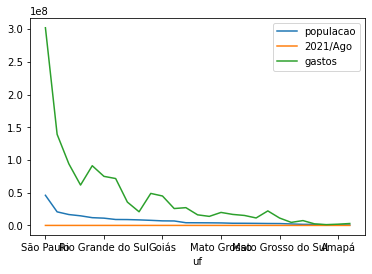

In [15]:
ultima_coluna = gastos_e_populacao.columns[-1]
gastos_e_populacao["gastos"] = gastos_e_populacao[ultima_coluna] * 1_000_000
gastos_e_populacao.plot()

In [16]:
gastos_e_populacao.loc[['Ceará', 'Pará']]

,populacao,2021/Ago,gastos
uf,,,
Ceará,8936431,35.65,35650000.00
Pará,8442962,20.84,20840000.00


In [17]:
gastos_e_populacao['gasto_por_habitante'] = gastos_e_populacao['gastos'] / gastos_e_populacao['populacao']
gastos_e_populacao.head()

,populacao,2021/Ago,gastos,gasto_por_habitante
uf,,,,
São Paulo,46024937,301.99,301990000.00,6.56
Minas Gerais,20732660,139.16,139160000.00,6.71
Rio de Janeiro,16615526,94.14,94140000.00,5.67
Bahia,14659023,61.65,61650000.00,4.21
Paraná,11835379,91.19,91190000.00,7.70


<AxesSubplot:xlabel='uf'>

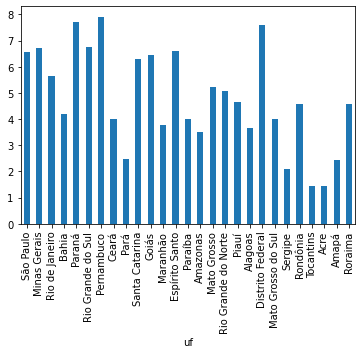

In [18]:
gastos_e_populacao['gasto_por_habitante'].plot(kind='bar')

#### !Challenge:
- ~review chart above and format as best practices (legend, titles)~
- put a average line to identify which status are above and below the average
- ~sort by populacao~

In [19]:
gastos_e_populacao.head()

,populacao,2021/Ago,gastos,gasto_por_habitante
uf,,,,
São Paulo,46024937,301.99,301990000.00,6.56
Minas Gerais,20732660,139.16,139160000.00,6.71
Rio de Janeiro,16615526,94.14,94140000.00,5.67
Bahia,14659023,61.65,61650000.00,4.21
Paraná,11835379,91.19,91190000.00,7.70


In [20]:
gastos_e_populacao_sorted_by_populacao = gastos_e_populacao.sort_values(by='populacao')

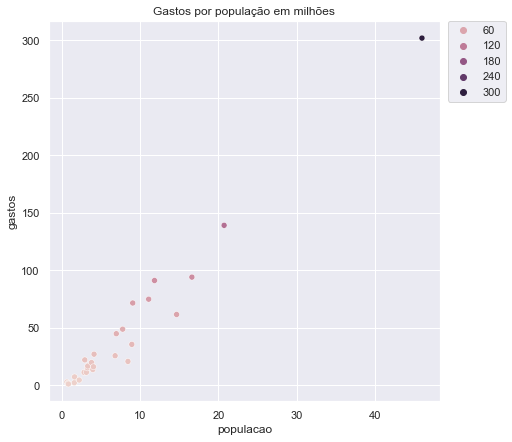

In [21]:
sns.set_theme()
plt.figure(figsize=(7,7))

axis = sns.scatterplot(data = gastos_e_populacao_sorted_by_populacao / 1_000_000,
                       x='populacao',
                       y='gastos',
                       hue='gastos')


plt.legend(bbox_to_anchor=(1.02, 1), 
           loc='upper left', 
           borderaxespad=0) #MOVING LEGEND OUTSIDE THE PLOT
plt.title('Gastos por população em milhões')
plt.show()

In [22]:
gastos_e_populacao_sorted = gastos_e_populacao.sort_values(by='gasto_por_habitante', ascending=False)

- put a average line to identify which status are above and below the average
- sort by gasto_por_habitante

In [23]:
gastos_e_populacao_sorted_by_gh = gastos_e_populacao.sort_values(by='gasto_por_habitante', 
                                                                 ascending=True)

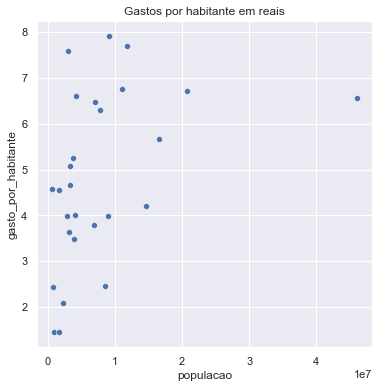

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = gastos_e_populacao_sorted_by_gh, 
                x='populacao',
                y='gasto_por_habitante')

plt.title('Gastos por habitante em reais')
plt.show()

#### !Challenge:
- Review titles with "_" and put a better title
- Make the same chart but now for the penultimate month
- Try yo make the same chart but for the last two months, comparing them by colors

### SECOND VIDEO

Getting data from last class

In [25]:
ordenados_por_total = pd.read_csv('../data/02-pos-data-analytics-visualizacao-de-dados/ordenados_por_total.csv',
                                 delimiter=';').sort_values(by='Total', ascending=False)

# 01 UPDATE INDEX
ordenados_por_total = ordenados_por_total.set_index('Unidade da Federação')
ordenados_por_total.index = ordenados_por_total.index.str[3:] #REMOVING EXTRA CHARACTERS

# 02 FILTERING COLUMNS
columns_filter = ordenados_por_total.columns[6:].tolist()
ordenados_por_total = ordenados_por_total[columns_filter]

# 03 DIVIDE BY MILLION TO FACILITATE DATA VISUALIZATION
ordenados_por_total = ordenados_por_total / 1_000_000

# 04 REMOVING TOTAL COLUMN TO FACILITATE PLOTS
ordenados_por_total = ordenados_por_total.drop(columns='Total')

In [26]:
ordenados_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,173.06,170.62,170.39,172.51,175.56,179.61,180.10,180.21,192.00,191.26,...,328.69,338.63,361.43,352.85,502.91,504.43,548.11,503.16,404.37,301.99
Minas Gerais,70.30,79.12,79.05,79.27,79.63,82.22,80.37,82.42,88.61,84.49,...,172.73,181.83,192.84,183.89,261.38,255.55,275.15,249.71,194.73,139.16
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,135.28,129.21,130.53,134.08,172.64,174.04,191.86,163.58,119.41,91.19
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,117.70,120.29,115.99,126.73,169.69,145.30,155.08,142.81,112.81,74.95
Rio de Janeiro,44.13,42.91,45.32,43.95,44.12,44.36,42.50,43.07,44.55,41.35,...,83.92,96.75,103.47,87.52,125.74,132.97,145.37,124.91,113.66,94.14


***

## AULA 03 - TICKS, ESCALAS E FORMAÇÃO DE IMAGEM

In [27]:
ordenados_por_total.loc['São Paulo']

2008/Fev   173.06
2008/Mar   170.62
2008/Abr   170.39
2008/Mai   172.51
2008/Jun   175.56
            ...  
2021/Abr   504.43
2021/Mai   548.11
2021/Jun   503.16
2021/Jul   404.37
2021/Ago   301.99
Name: São Paulo, Length: 163, dtype: float64

<AxesSubplot:ylabel='São Paulo'>

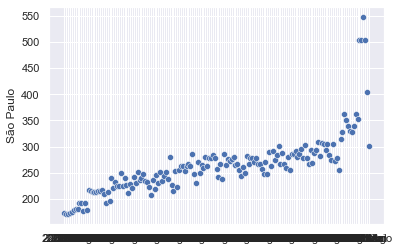

In [28]:
sns.scatterplot(x=ordenados_por_total.columns, y=ordenados_por_total.loc['São Paulo'])

In [29]:
# TRANSFORMING THE DATA TO FACILITATE PLOTING
mensal = ordenados_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,173.06,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.62,79.12,55.61,52.93,42.91,41.33,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.39,79.05,56.12,51.97,45.32,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.51,79.27,55.57,51.68,43.95,42.10,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.56,79.63,56.09,53.76,44.12,39.91,28.95,28.99,29.46,20.39,...,10.47,10.31,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [30]:
# sns.scatterplot(dabta=mensal, x=mensal.index, y='São Paulo')

#### !Challenge: OK
1. Make the same chart but for 2 UFs, one color for each other

In [31]:
mensal[['São Paulo', 'Minas Gerais']].T

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,173.06,170.62,170.39,172.51,175.56,179.61,180.10,180.21,192.00,191.26,...,328.69,338.63,361.43,352.85,502.91,504.43,548.11,503.16,404.37,301.99
Minas Gerais,70.30,79.12,79.05,79.27,79.63,82.22,80.37,82.42,88.61,84.49,...,172.73,181.83,192.84,183.89,261.38,255.55,275.15,249.71,194.73,139.16


<AxesSubplot:ylabel='São Paulo'>

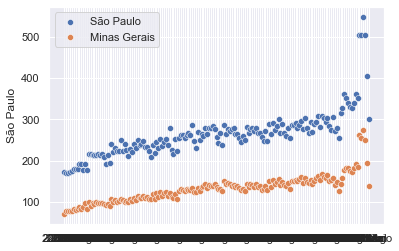

In [32]:
sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo', label='São Paulo')
sns.scatterplot(data=mensal, x=mensal.index, y='Minas Gerais', label='Minas Gerais')

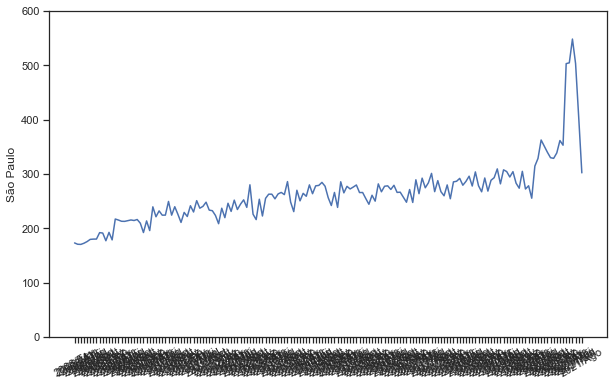

In [33]:
sns.set_style('ticks')
plt.figure(figsize=(10,6))
sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(0, 600)
plt.show()

#### !Challenge: OK
- In the above chart, set a maximum Y value that fits all values (also unexpected values) with a "white space".

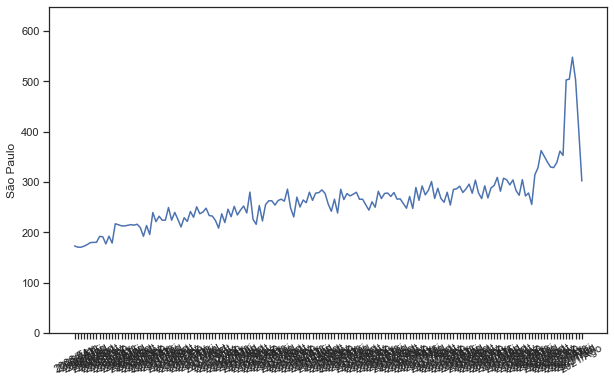

In [34]:
sns.set_style('ticks')
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(0, max(mensal['São Paulo'].values) + 100) # EXERCISE ANSWERED USING MAX VALUE FOR THE SERIES PROVIDED
plt.show()

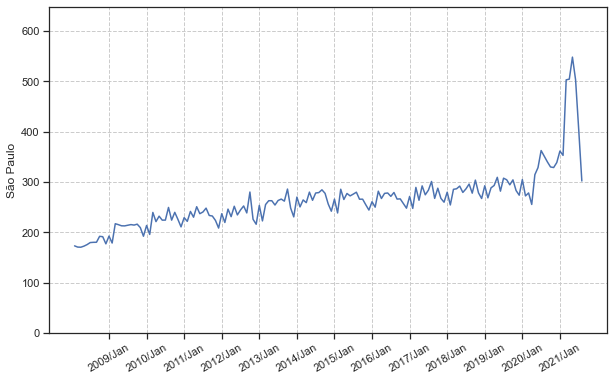

In [35]:
# USING GRID TO IMPROVE THE VISUALIZATION
sns.set_style('ticks')
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.xaxis.set_major_locator(mticker.IndexLocator(base=12, offset=11)) #CHANGING THE GRIDS, base=DE QUANTO EM QUANTO, offset=COMEÇA A ONDE (index)?

plt.xticks(rotation=30)
plt.ylim(0, max(mensal['São Paulo'].values) + 100) # EXERCISE ANSWERED USING MAX VALUE FOR THE SERIES PROVIDED
plt.grid(linestyle='--')
plt.show()

#### !Challenge OK
- Looks like February data always decrease, is that true? What is the reason for that?

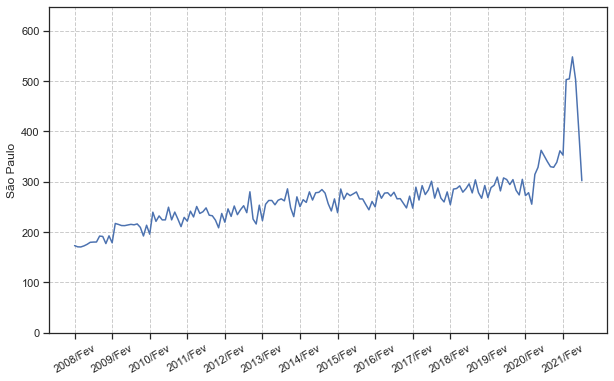

In [36]:
# USING GRID TO IMPROVE THE VISUALIZATION
sns.set_style('ticks')
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.xaxis.set_major_locator(mticker.IndexLocator(base=12, offset=0)) #CHANGING THE GRIDS, base=DE QUANTO EM QUANTO, offset=COMEÇA A ONDE (index)?

plt.xticks(rotation=30)
plt.ylim(0, max(mensal['São Paulo'].values) + 100) # EXERCISE ANSWERED USING MAX VALUE FOR THE SERIES PROVIDED
plt.grid(linestyle='--')
plt.show()

**Hypothesis:** maybe beacause there is no update data to indicate proper investiment, consnider last year may occur bad allocation foro the costs

#### !Challenge: OK
- Set a minor_locator in the July data

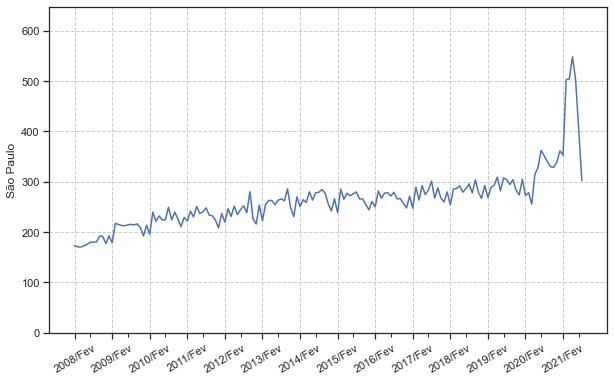

In [37]:
# USING GRID TO IMPROVE THE VISUALIZATION
sns.set_style('ticks')
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.xaxis.set_major_locator(mticker.IndexLocator(base=12, offset=0)) #CHANGING THE GRIDS, base=DE QUANTO EM QUANTO, offset=COMEÇA A ONDE (index)?
ax.xaxis.set_minor_locator(mticker.IndexLocator(base=12, offset=5))

plt.xticks(rotation=30)
plt.ylim(0, max(mensal['São Paulo'].values) + 100) # EXERCISE ANSWERED USING MAX VALUE FOR THE SERIES PROVIDED
plt.grid(linestyle='--')
plt.show()

**TO BE HONEST, I DIDN'T NOTICE ANY SIGNIFICANT CHANGE...**

***

## AULA 04 - TRABALHANDO DATETIME E MELT

### FIRST VIDEO

In [38]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 2008/Fev to 2021/Ago
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            163 non-null    float64
 1   Minas Gerais         163 non-null    float64
 2   Paraná               163 non-null    float64
 3   Rio Grande do Sul    163 non-null    float64
 4   Rio de Janeiro       163 non-null    float64
 5   Bahia                163 non-null    float64
 6   Pernambuco           163 non-null    float64
 7   Santa Catarina       163 non-null    float64
 8   Ceará                163 non-null    float64
 9   Goiás                163 non-null    float64
 10  Pará                 163 non-null    float64
 11  Maranhão             163 non-null    float64
 12  Espírito Santo       163 non-null    float64
 13  Rio Grande do Norte  163 non-null    float64
 14  Paraíba              163 non-null    float64
 15  Distrito Federal     163 non-null

In [39]:
mensal.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2020/Nov', '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr',
       '2021/Mai', '2021/Jun', '2021/Jul', '2021/Ago'],
      dtype='object', length=163)

CREATING FUNCTION TO EXEMPLIFY map FUNCTION

In [40]:
def f(x):
    print(f'valor: {x}')

In [41]:
# FOR EACH VALUE IN THE INDEX, APPLY THE FUNCTION f
mensal.index.map(f)

valor: 2008/Fev
valor: 2008/Mar
valor: 2008/Abr
valor: 2008/Mai
valor: 2008/Jun
valor: 2008/Jul
valor: 2008/Ago
valor: 2008/Set
valor: 2008/Out
valor: 2008/Nov
valor: 2008/Dez
valor: 2009/Jan
valor: 2009/Fev
valor: 2009/Mar
valor: 2009/Abr
valor: 2009/Mai
valor: 2009/Jun
valor: 2009/Jul
valor: 2009/Ago
valor: 2009/Set
valor: 2009/Out
valor: 2009/Nov
valor: 2009/Dez
valor: 2010/Jan
valor: 2010/Fev
valor: 2010/Mar
valor: 2010/Abr
valor: 2010/Mai
valor: 2010/Jun
valor: 2010/Jul
valor: 2010/Ago
valor: 2010/Set
valor: 2010/Out
valor: 2010/Nov
valor: 2010/Dez
valor: 2011/Jan
valor: 2011/Fev
valor: 2011/Mar
valor: 2011/Abr
valor: 2011/Mai
valor: 2011/Jun
valor: 2011/Jul
valor: 2011/Ago
valor: 2011/Set
valor: 2011/Out
valor: 2011/Nov
valor: 2011/Dez
valor: 2012/Jan
valor: 2012/Fev
valor: 2012/Mar
valor: 2012/Abr
valor: 2012/Mai
valor: 2012/Jun
valor: 2012/Jul
valor: 2012/Ago
valor: 2012/Set
valor: 2012/Out
valor: 2012/Nov
valor: 2012/Dez
valor: 2013/Jan
valor: 2013/Fev
valor: 2013/Mar
valor: 2

Index([None, None, None, None, None, None, None, None, None, None,
       ...
       None, None, None, None, None, None, None, None, None, None],
      dtype='object', length=163)

CREATING A FUNCTION TO RETURN PROPER DATE TYPE

In [42]:
from datetime import date

In [43]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12
}

In [44]:
def para_dia(ano_mes: str):
    ano: int = int(ano_mes[:4])
    mes_como_string: str = ano_mes[5:]
    mes: int = meses[mes_como_string] #USING DICTIONARY FROM LAST CELL TO BRING MONTH NUMBER
    return date(ano, mes, 1)

In [45]:
# APPLYING FUNCTION
mensal.index.map(para_dia)

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2020-11-01, 2020-12-01, 2021-01-01, 2021-02-01, 2021-03-01, 2021-04-01,
       2021-05-01, 2021-06-01, 2021-07-01, 2021-08-01],
      dtype='object', length=163)

In [46]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,173.06,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.62,79.12,55.61,52.93,42.91,41.33,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.39,79.05,56.12,51.97,45.32,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.51,79.27,55.57,51.68,43.95,42.10,31.42,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.56,79.63,56.09,53.76,44.12,39.91,28.95,28.99,29.46,20.39,...,10.47,10.31,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


**NOW WE HAVE A BETTER MONTH VISUALIZATION**

CHECKING THE CHART AGAIN:

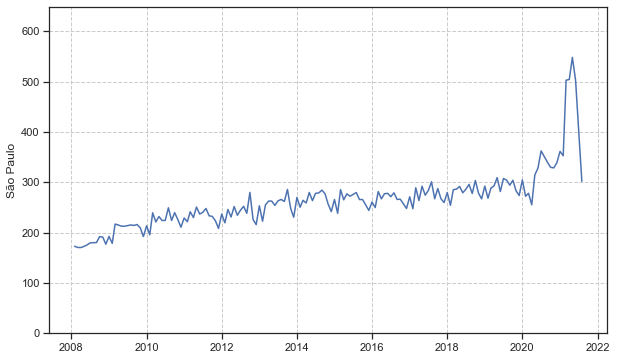

In [47]:
# USING GRID TO IMPROVE THE VISUALIZATION
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')

plt.ylim(0, max(mensal['São Paulo'].values) + 100)
plt.grid(linestyle='--')
plt.show()

In [48]:
mensal.index[0] #CHECKING DATETYPE AFTER CONVERTING

datetime.date(2008, 2, 1)

### SECOND VIDEO

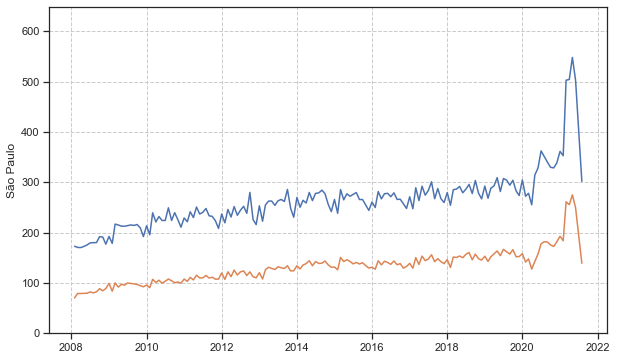

In [49]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax = sns.lineplot(data=mensal, x=mensal.index, y='Minas Gerais')

plt.ylim(0, max(mensal['São Paulo'].values) + 100)
plt.grid(linestyle='--')
plt.show()

VISUALIZAING THE SAME DATA IN A DIFFERENT WAY USING **melt()**

```
MES     VALOR     ESTADO
2008-02 173.06    São Paulo
2008-03 173.06    São Paulo
...
2008-02 70.30     Minas Gerais
2008-03 79.12     Minas Gerais

```

In [50]:
"""USING MELT TO "OPEN" THE TABLE, THE melt(), 
        THE id_vars = THE COLUNS THAT WILL IDENTIFY THE VARIABLE, ]
        FOLLOWED BY value_var = THE VALUES THAT I WANT TO EXTRACT/"OPEN"
"""
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['mes', 'uf', 'gasto']
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,173.06
1,2008-03-01,São Paulo,170.62
2,2008-04-01,São Paulo,170.39
3,2008-05-01,São Paulo,172.51
4,2008-06-01,São Paulo,175.56


#### !Challenge: OK
- Create the **mensal** data from **mensal_aberto**, the way back formatting

TARGET:

In [51]:
mensal.head(2)

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,173.06,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.62,79.12,55.61,52.93,42.91,41.33,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18


SOLUTION

In [52]:
#ANSWER
mensal_aberto.pivot_table(values='gasto', index='mes', columns='uf')

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.13,1.94,0.77,24.41,4.64,173.06,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.33,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.91,1.96,0.88,27.48,5.02,170.62,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.32,2.14,0.90,27.81,5.27,170.39,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.10,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.51,5.34
2008-06-01,2.11,10.31,1.42,8.65,39.91,29.46,11.97,11.89,20.39,14.55,...,10.47,10.45,53.76,44.12,2.62,0.94,28.99,4.98,175.56,5.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,5.00,29.41,5.15,24.52,115.93,100.54,35.64,58.03,68.63,51.80,...,32.37,38.41,145.30,132.97,17.75,4.19,89.98,19.14,504.43,9.76
2021-05-01,4.33,30.55,5.67,23.97,134.23,102.83,32.43,57.35,69.47,55.32,...,32.55,41.82,155.08,145.37,17.66,3.68,101.66,19.72,548.11,10.16
2021-06-01,3.46,26.89,5.47,22.18,120.52,81.92,27.20,48.14,67.16,51.96,...,26.02,34.44,142.81,124.91,14.44,3.48,93.06,15.01,503.16,6.35


GOING FOWARD WITH **mensal_aberto**

In [53]:
mensal_aberto.head(2)

,mes,uf,gasto
0,2008-02-01,São Paulo,173.06
1,2008-03-01,São Paulo,170.62


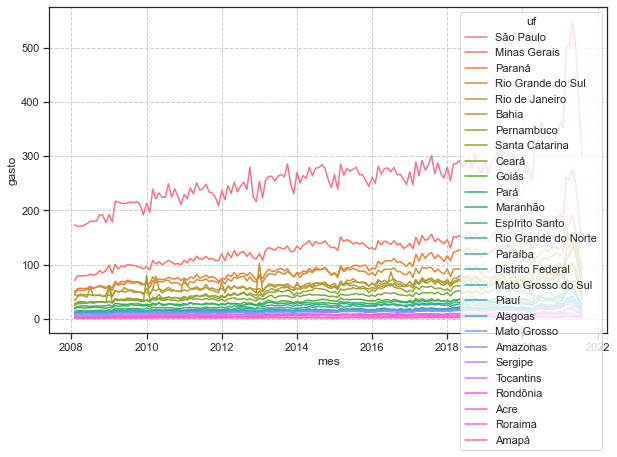

In [54]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal_aberto, x='mes', y='gasto', hue='uf')

plt.grid(linestyle='--')
plt.show()

#### !Challenge: OK
- Plot only two UFs with **mensal_aberto**

In [55]:
filtro_dois_estados = mensal_aberto[(mensal_aberto['uf'] == 'São Paulo')
                                    | (mensal_aberto['uf'] == 'Bahia')]

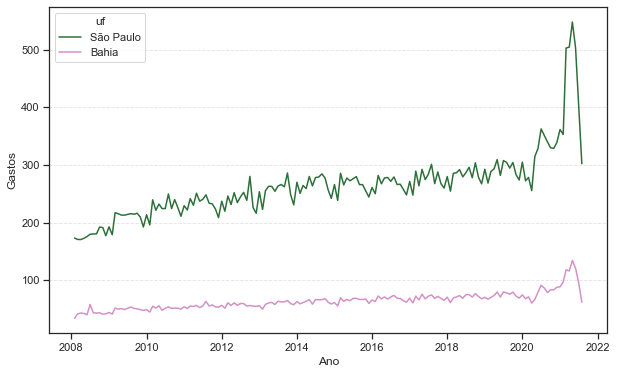

In [56]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=filtro_dois_estados, x='mes', y='gasto', hue='uf', palette='cubehelix')

plt.xlabel('Ano')
plt.ylabel('Gastos')

plt.grid(color='#e5e5e5', linestyle='--', linewidth=0.9, axis='y')

plt.show()

***

## AULA 05 - MANIPULANDO DATAS E GERANDO NOVAS ANÁLISES

RENAMING COLUMN

In [61]:
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto']
mensal_aberto['dia_mes_ano'][0]

datetime.date(2008, 2, 1)

In [62]:
mensal_aberto['dia_mes_ano'][0].year

2008

In [65]:
mensal_aberto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dia_mes_ano  4401 non-null   object 
 1   uf           4401 non-null   object 
 2   gasto        4401 non-null   float64
dtypes: float64(1), object(2)
memory usage: 103.3+ KB


In [66]:
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype("datetime64")

#OR
#mensal_aberto['dia_mes_ano'] = pd.to_datetime(mensal_aberto['dia_mes_ano'])

In [67]:
mensal_aberto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dia_mes_ano  4401 non-null   datetime64[ns]
 1   uf           4401 non-null   object        
 2   gasto        4401 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 103.3+ KB


In [69]:
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes
0,2008-02-01,São Paulo,173.06,2008,2
1,2008-03-01,São Paulo,170.62,2008,3
2,2008-04-01,São Paulo,170.39,2008,4
3,2008-05-01,São Paulo,172.51,2008,5
4,2008-06-01,São Paulo,175.56,2008,6


USING QUERY TO FILTER

In [70]:
mensal_aberto.query("uf == 'São Paulo'")

,dia_mes_ano,uf,gasto,ano,mes
0,2008-02-01,São Paulo,173.06,2008,2
1,2008-03-01,São Paulo,170.62,2008,3
2,2008-04-01,São Paulo,170.39,2008,4
3,2008-05-01,São Paulo,172.51,2008,5
4,2008-06-01,São Paulo,175.56,2008,6
...,...,...,...,...,...
158,2021-04-01,São Paulo,504.43,2021,4
159,2021-05-01,São Paulo,548.11,2021,5
160,2021-06-01,São Paulo,503.16,2021,6
161,2021-07-01,São Paulo,404.37,2021,7


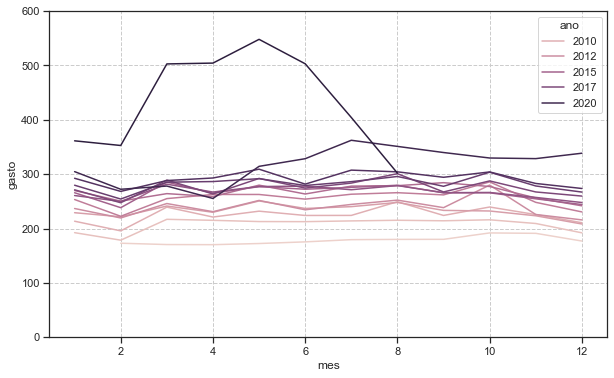

In [73]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"),
                 x='mes',
                 y='gasto',
                 hue='ano')
plt.ylim(0, 600)
plt.grid(linestyle='--')
plt.show()

#### !Challenge: OK
- Choose one year and plot this year for two differentes states (UFs) in the same chart.

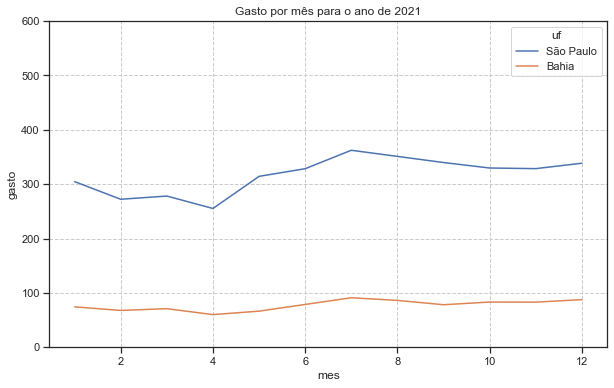

In [83]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("ano == 2020 & (uf == 'São Paulo' | uf == 'Bahia')"),
                   x='mes',
                   y='gasto',
                   hue='uf')
plt.ylim(0, 600)
plt.grid(linestyle='--')
plt.title('Gasto por mês para o ano de 2021')
plt.show()

***

CREATING "dias_por_mes"

In [86]:
mensal_aberto

,dia_mes_ano,uf,gasto,ano,mes
0,2008-02-01,São Paulo,173.06,2008,2
1,2008-03-01,São Paulo,170.62,2008,3
2,2008-04-01,São Paulo,170.39,2008,4
3,2008-05-01,São Paulo,172.51,2008,5
4,2008-06-01,São Paulo,175.56,2008,6
...,...,...,...,...,...
4396,2021-04-01,Amapá,5.15,2021,4
4397,2021-05-01,Amapá,5.67,2021,5
4398,2021-06-01,Amapá,5.47,2021,6
4399,2021-07-01,Amapá,4.14,2021,7


CREATING FUNCTION TO RETURN THE AMOUNT OF DAYS IN A SPEIFIC MONTH

In [89]:
dias_por_mes = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}

In [90]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
0,2008-02-01,São Paulo,173.06,2008,2,6.18
1,2008-03-01,São Paulo,170.62,2008,3,5.50
2,2008-04-01,São Paulo,170.39,2008,4,5.68
3,2008-05-01,São Paulo,172.51,2008,5,5.56
4,2008-06-01,São Paulo,175.56,2008,6,5.85


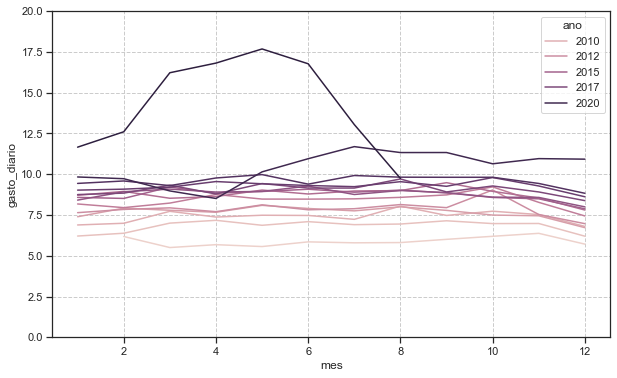

In [99]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"),
                   x='mes',
                   y='gasto_diario',
                   hue='ano')
plt.ylim(0, 20)
plt.grid(linestyle='--')
plt.show()

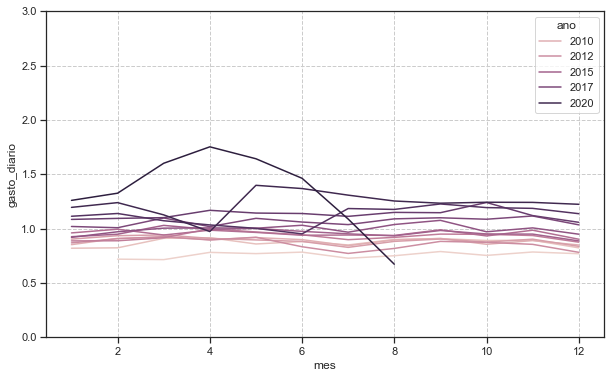

In [100]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'Pará'"),
                   x='mes',
                   y='gasto_diario',
                   hue='ano')
plt.ylim(0, 3)
plt.grid(linestyle='--')
plt.show()

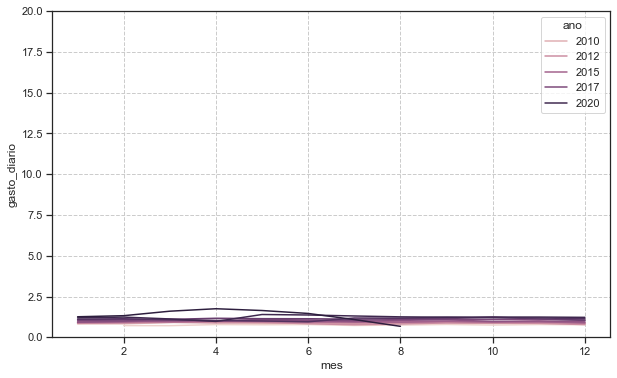

In [101]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'Pará'"),
                   x='mes',
                   y='gasto_diario',
                   hue='ano')
plt.ylim(0, 20)
plt.grid(linestyle='--')
plt.show()

#### !Challenge: OK pero no mucho
- Create a single chart with a unique year for São Paulo and São Paulo

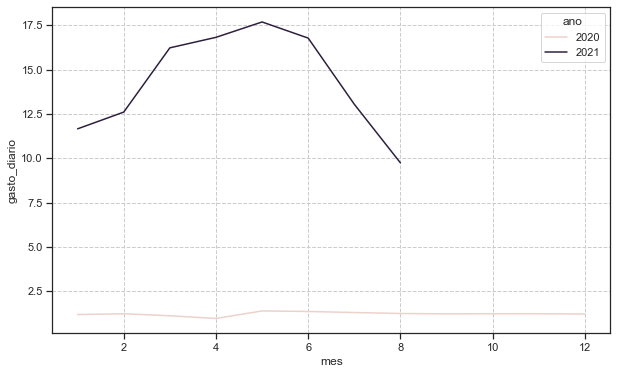

In [117]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("(uf == 'São Paulo' & ano == 2021) | (uf == 'Pará' & ano == 2020)"),
                  x='mes',
                  y='gasto_diario',
                  hue='ano')
plt.grid(linestyle='--')
plt.show()

#### !Challenge:
- Choose two UFs, take population for both of them for the last 12 months and calculate costs by person. Create a chart for one line by state

***

## AULA 06 - AGRUPANDO DADOS E ANALISANDO POR CATEGORIA

### FIRST VIDEO

In [122]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
0,2008-02-01,São Paulo,173.06,2008,2,6.18
1,2008-03-01,São Paulo,170.62,2008,3,5.50
2,2008-04-01,São Paulo,170.39,2008,4,5.68
3,2008-05-01,São Paulo,172.51,2008,5,5.56
4,2008-06-01,São Paulo,175.56,2008,6,5.85


In [123]:
mensal_do_meu_estado = mensal_aberto.query("uf == 'São Paulo'")
mensal_do_meu_estado.head()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
0,2008-02-01,São Paulo,173.06,2008,2,6.18
1,2008-03-01,São Paulo,170.62,2008,3,5.50
2,2008-04-01,São Paulo,170.39,2008,4,5.68
3,2008-05-01,São Paulo,172.51,2008,5,5.56
4,2008-06-01,São Paulo,175.56,2008,6,5.85


In [125]:
gastos_por_ano = mensal_do_meu_estado.groupby('ano').sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,1962.42,77,64.67
2009,2490.55,78,81.87
2010,2700.26,78,88.74
2011,2796.46,78,91.97
2012,2877.14,78,94.57


BAD CHART

<AxesSubplot:ylabel='gasto'>

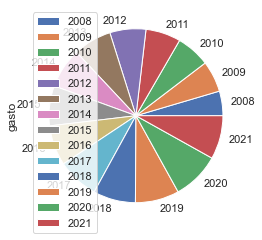

In [128]:
gastos_por_ano.plot(kind='pie', y='gasto')

BETTER CHART

<AxesSubplot:xlabel='ano', ylabel='gasto'>

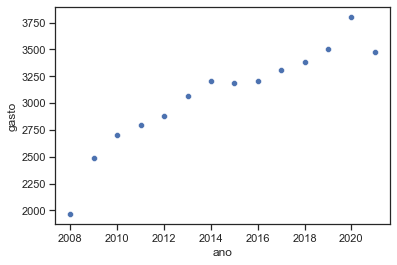

In [131]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

USEFUL CHART, FOR THIS CASE THE LINEPLOT IS NOT THE BEST CHOICE BECAUSE IT PRETEND THAT THERE ARE DATA BETWEEN THE YEARS, THAT IS NOT THE CASE. FOR THIS CASE IS BETTER TO USE THE SCATTERPLOT

<AxesSubplot:xlabel='ano', ylabel='gasto'>

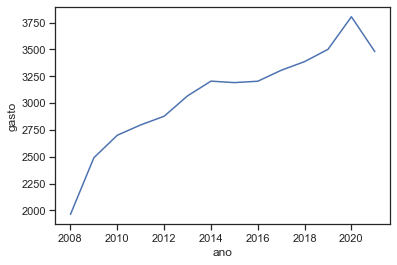

In [132]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

BAR CHART TO COMPARE

<AxesSubplot:xlabel='ano', ylabel='gasto'>

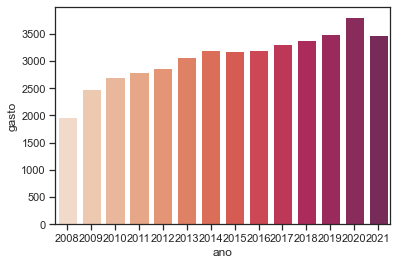

In [142]:
paleta = sns.color_palette('rocket_r', 20)
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', palette = paleta)

#### !Challenge:
- put the color according with values, to highlight

***

### SECOND VIDEO

In [155]:
estados = ['Amazonas', 'Mato Grosso', 'Ceará']
#QUICK WAY TO CHECK IF A VALUE IS INSIDE A LIST (@variable_name)
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(['uf', 'ano']).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Amazonas,2008,91.28,77,3.01
1,Amazonas,2009,106.49,78,3.50
2,Amazonas,2010,114.18,78,3.75
3,Amazonas,2011,120.26,78,3.96
4,Amazonas,2012,122.92,78,4.04


<AxesSubplot:xlabel='ano', ylabel='gasto'>

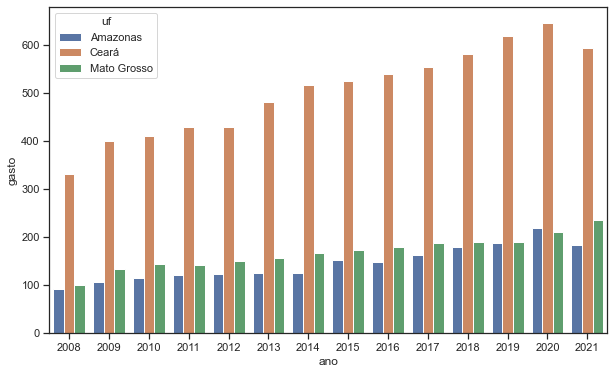

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

<AxesSubplot:xlabel='ano', ylabel='gasto'>

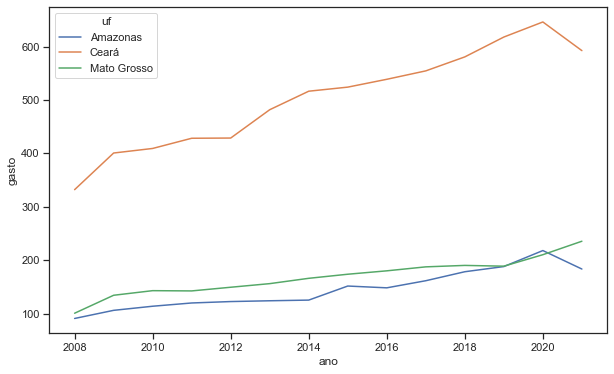

In [159]:
plt.figure(figsize=(10,6))
sns.lineplot(data=por_ano_dos_estados, x='ano', y='gasto', hue='uf')

NOW LET'S WORK WITH FUNCTIONS OF HIGH LEVEL
- The catplot we can build several chart based on a single column as a key
- catplot = category plot

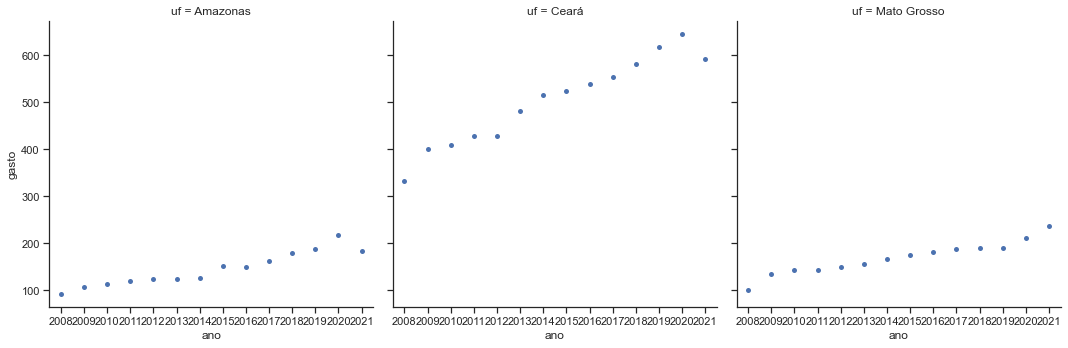

In [163]:
# plt.figure(figsize=(10,6))
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', col='uf')

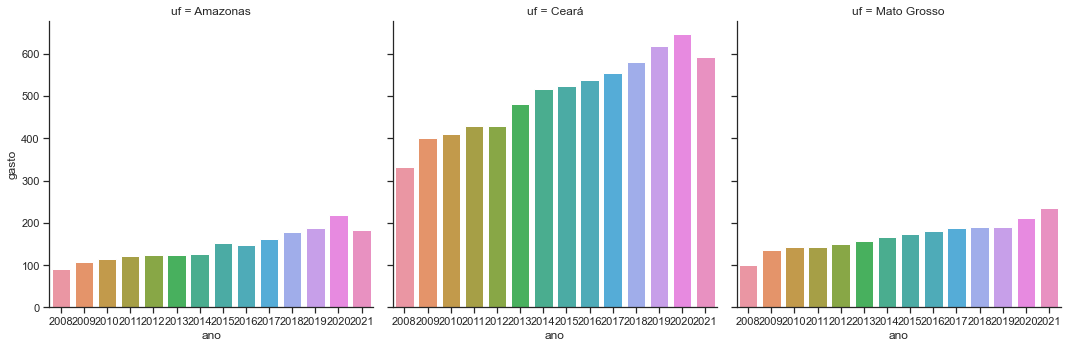

In [164]:
# plt.figure(figsize=(10,6))
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', col='uf', kind='bar')

#USING ROW

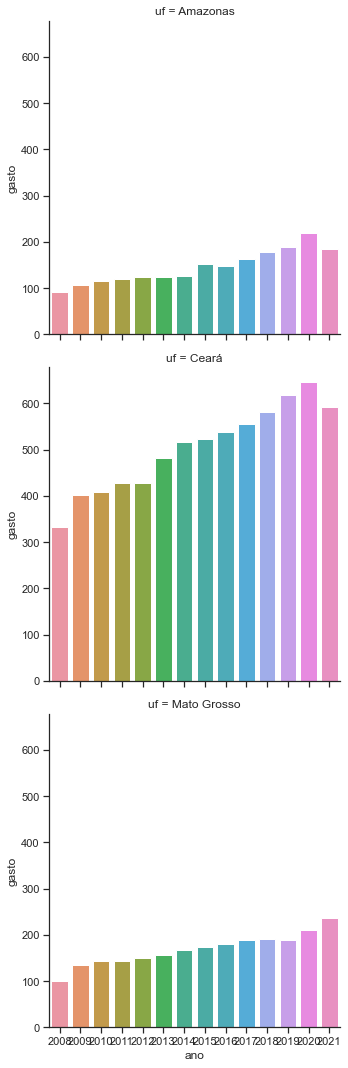

In [165]:
# plt.figure(figsize=(10,6))
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', row='uf', kind='bar')

#### !Challenge:
- explore seaborn and choose a new chart
- refine last class that we used the "col" parametr
- plot 4 UFs, 2x2 dimension